In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# We will use the AMES housing dataset by Dean De Cock

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t') # Tab separated
# This is unnecessarily large, so let's pick out a subset of 5 variables, along wit the target
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = df[columns]

# There is only one missing entry. Let's drop that row, since we have a large enough dataset
df = df.dropna(axis=0)
# Let's encode the central air conditioning variable
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [3]:
X = df[df.columns[df.columns != 'SalePrice']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
# The L2 regularized regressor is known as Ridge regression
from sklearn.linear_model import Ridge
# The L1 regularized regression is known as LASSO
from sklearn.linear_model import Lasso
# The Elastic Net uses both, containing the ratio of the L1 to the L2 coefficients
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# alpha is the regularizer strength (not the inverse)

ridge = Ridge(alpha=1.0)

lasso = Lasso(alpha=1.0)

# an l1 ratio of 0.5 is an even split between the l1 and l2 penalties 
elnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

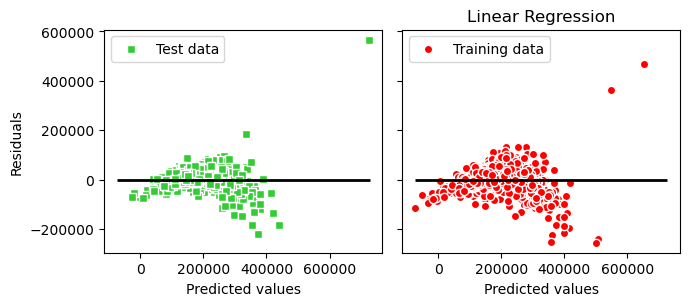

Linear Regression MSE train: 1497216245.85
Linear Regression MSE test: 1516565821.00
Linear Regression MAE train: 25983.03
Linear Regression MAE test: 24921.29
Linear Regression R^2 train: 0.77
Linear Regression R^2 test: 0.75


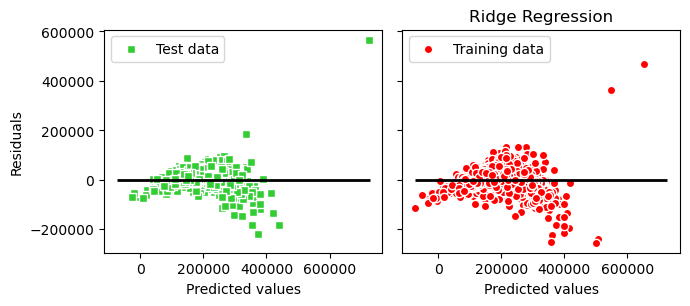

Ridge Regression MSE train: 1497216806.17
Ridge Regression MSE test: 1516670290.68
Ridge Regression MAE train: 25982.44
Ridge Regression MAE test: 24921.21
Ridge Regression R^2 train: 0.77
Ridge Regression R^2 test: 0.75


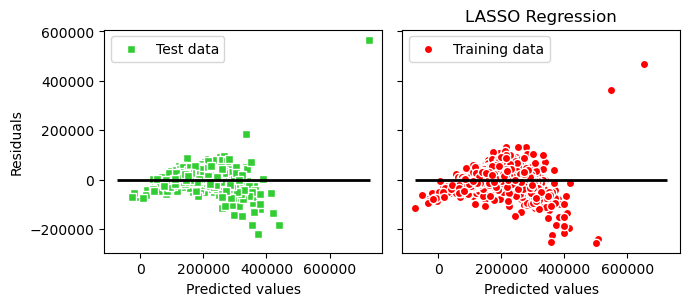

LASSO Regression MSE train: 1497216262.01
LASSO Regression MSE test: 1516576757.92
LASSO Regression MAE train: 25983.09
LASSO Regression MAE test: 24921.40
LASSO Regression R^2 train: 0.77
LASSO Regression R^2 test: 0.75


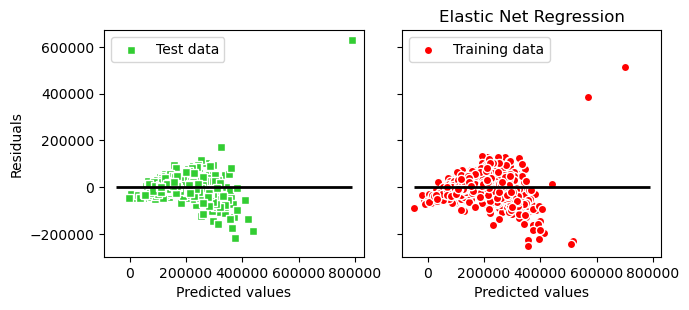

Elastic Net Regression MSE train: 1578089838.64
Elastic Net Regression MSE test: 1667095951.83
Elastic Net Regression MAE train: 25994.08
Elastic Net Regression MAE test: 25274.25
Elastic Net Regression R^2 train: 0.76
Elastic Net Regression R^2 test: 0.73


In [7]:
model_names = ['Linear Regression', 'Ridge Regression', 'LASSO Regression', 'Elastic Net Regression']
mods = [lr, ridge, lasso, elnet]
for name, model in zip(model_names, mods):
    model.fit(X_train, y_train)
# We can visually inspect the residuals
    prediced_train = model.predict(X_train)
    predicted_test = model.predict(X_test)
    x_max = np.max([np.max(prediced_train), np.max(predicted_test)])
    x_min = np.min([np.min(prediced_train), np.min(predicted_test)])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
    ax1.scatter(predicted_test, predicted_test - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    ax2.scatter(prediced_train, prediced_train - y_train, c='red', marker='o', edgecolor='white', label='Training data')
    ax1.set_ylabel('Residuals')
    for ax in (ax1, ax2):
        ax.set_xlabel('Predicted values')
        ax.legend(loc='upper left')
        ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)
    plt.tight_layout()
    plt.title(name)
    plt.show()

    # Now, check the MSE

    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mse_test = mean_squared_error(y_test, model.predict(X_test))

    print(f'{name} MSE train: {mse_train:.2f}')
    print(f'{name} MSE test: {mse_test:.2f}')

    # Now, check the MAE - this emphasizes the incorrect prediction a little less

    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    mae_test = mean_absolute_error(y_test, model.predict(X_test))

    print(f'{name} MAE train: {mae_train:.2f}')
    print(f'{name} MAE test: {mae_test:.2f}')

    train_r2 = r2_score(y_train, prediced_train)
    test_r2 = r2_score(y_test, predicted_test)

    print(f"{name} R^2 train: {train_r2:.2f}")
    print(f"{name} R^2 test: {test_r2:.2f}")